In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from warnings import filterwarnings
filterwarnings ('ignore')
import missingno as msno
import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
df=pd.read_csv('superstore_eda.csv')
df.head()

Row ID        Order ID  Order Date   Ship Date  days to ship  \
0       1  CA-2016-152156  08-11-2016  11-11-2016             3   
1       2  CA-2016-152156  08-11-2016  11-11-2016             3   
2       3  CA-2016-138688  12-06-2016  16-06-2016             4   
3       4  US-2015-108966  11-10-2015  18-10-2015             7   
4       5  US-2015-108966  11-10-2015  18-10-2015             7   

        Ship Mode Customer ID    Customer Name    Segment        Country  ...  \
0    Second Class    CG-12520      Claire Gute   Consumer  United States  ...   
1    Second Class    CG-12520      Claire Gute   Consumer  United States  ...   
2    Second Class    DV-13045  Darrin Van Huff  Corporate  United States  ...   
3  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States  ...   
4  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States  ...   

  Postal Code Region       Product ID         Category Sub-Category  \
0       42420  South  FUR-BO-10001798        Furniture    Bookcases   
1       42420  South  FUR-CH-10000454        Furniture       Chairs   
2       90036   West  OFF-LA-10000240  Office Supplies       Labels   
3       33311  South  FUR-TA-10000577        Furniture       Tables   
4       33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name Sales Price Quantity  \
0                  Bush Somerset Collection Bookcase    261.9600      2.0   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...    731.9400      3.0   
2  Self-Adhesive Address Labels for Typewriters b...     14.6200      2.0   
3      Bretford CR4500 Series Slim Rectangular Table    957.5775      5.0   
4                     Eldon Fold 'N Roll Cart System     22.3680      2.0   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 22 columns]

In [3]:
df.shape

(10014, 22)

In [4]:
df.isnull().sum()/df.shape[0]*100

Row ID           0.000000
Order ID         0.000000
Order Date       0.000000
Ship Date        0.000000
days to ship     0.000000
Ship Mode        0.978630
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.000000
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
Sales Price      0.000000
Quantity         0.179748
Discount         0.000000
Profit           0.000000
dtype: float64

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'days to ship',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales Price', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

<Axes: >

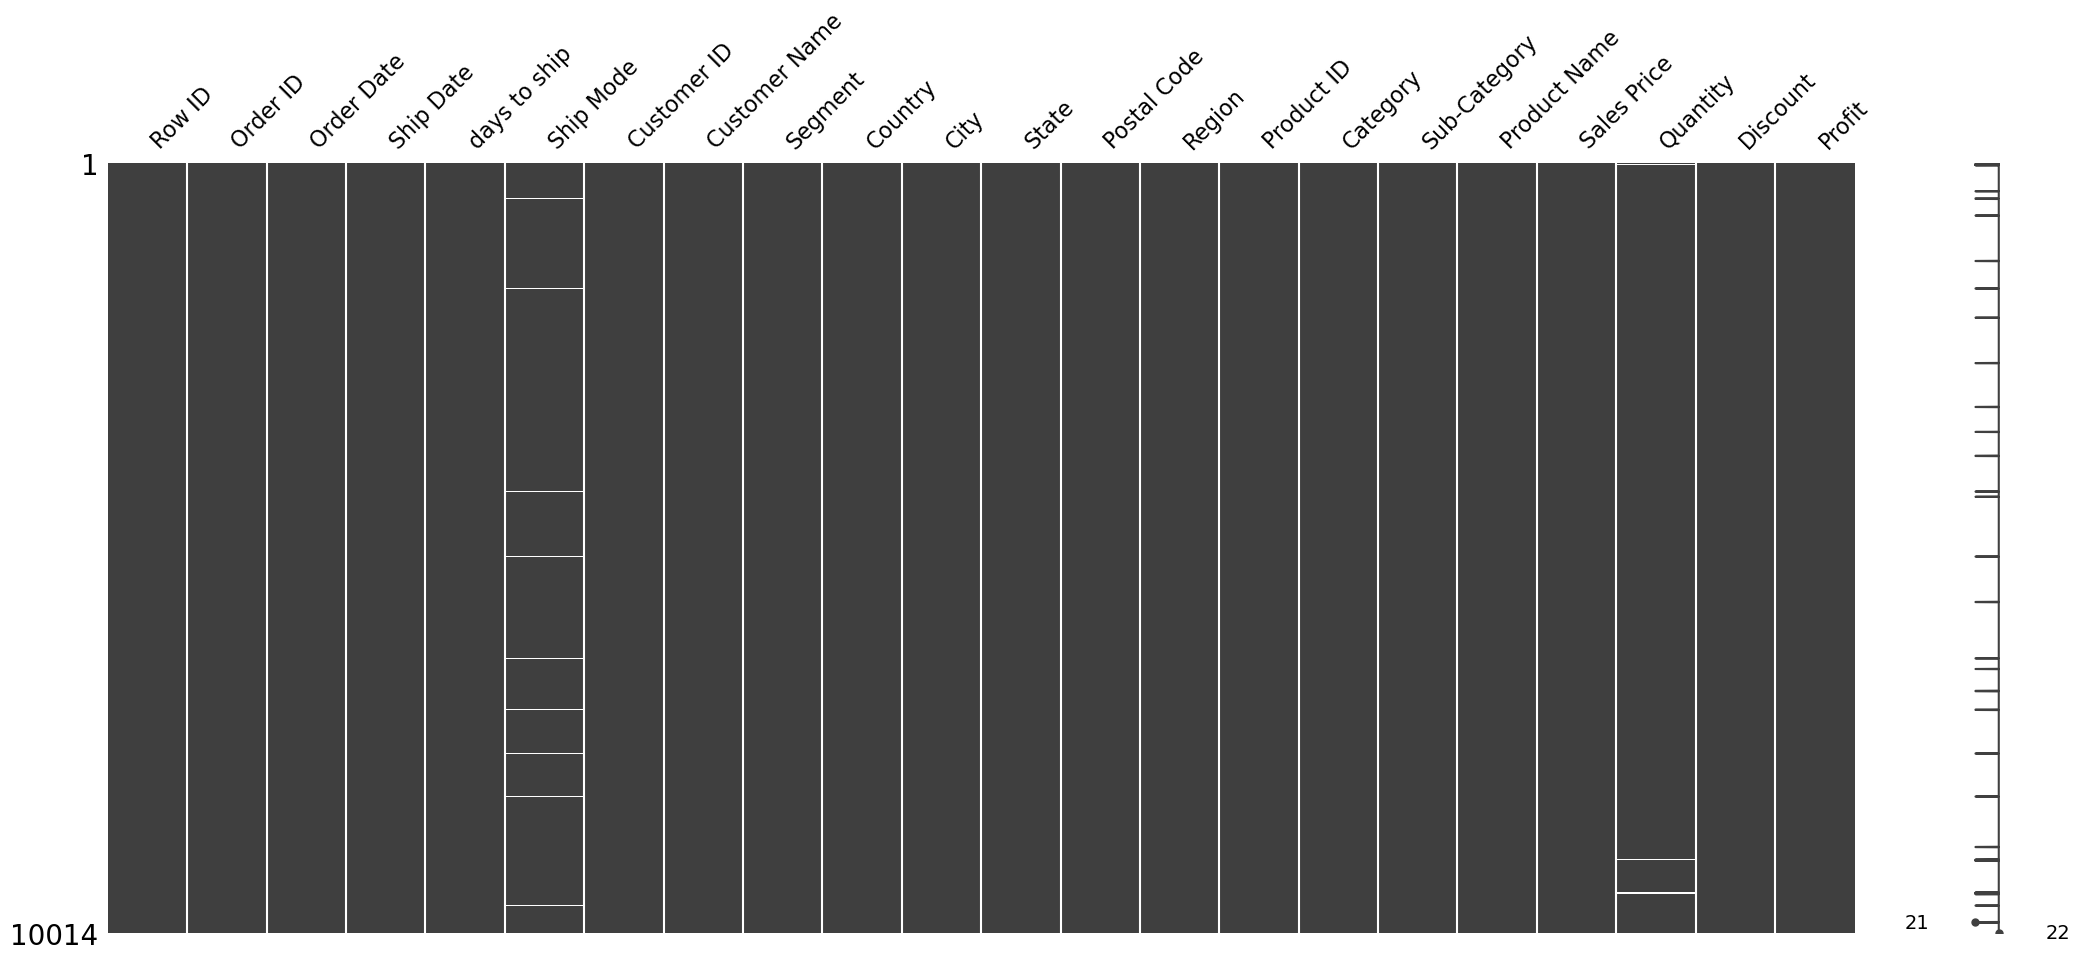

In [6]:
# visualising the missing values

msno.matrix(df)

In [7]:
# dealing with missing values
# filling the missing values with mode in the ship mode column

df['Ship Mode'].fillna(df['Ship Mode'].mode()[0],inplace=True)

In [8]:
# filling the missing values with median in the quantity column

df['Quantity'].fillna(df['Quantity'].median(),inplace=True)

In [9]:
# dropping the irrevelent columns

df.drop('Row ID',axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       10014 non-null  object 
 1   Order Date     10014 non-null  object 
 2   Ship Date      10014 non-null  object 
 3   days to ship   10014 non-null  int64  
 4   Ship Mode      10014 non-null  object 
 5   Customer ID    10014 non-null  object 
 6   Customer Name  10014 non-null  object 
 7   Segment        10014 non-null  object 
 8   Country        10014 non-null  object 
 9   City           10014 non-null  object 
 10  State          10014 non-null  object 
 11  Postal Code    10014 non-null  int64  
 12  Region         10014 non-null  object 
 13  Product ID     10014 non-null  object 
 14  Category       10014 non-null  object 
 15  Sub-Category   10014 non-null  object 
 16  Product Name   10014 non-null  object 
 17  Sales Price    10014 non-null  float64
 18  Quanti

In [11]:
# printing the unique columns of object datatype

for x in df.select_dtypes(include='object'):
    print(x)
    print(df[x].unique())
    print('')

Order ID
['CA-2016-152156' 'CA-2016-138688' 'US-2015-108966' ... 'CA-2014-110422'
 'CA-2017-121258' 'CA-2017-119914']

Order Date
['08-11-2016' '12-06-2016' '11-10-2015' ... '28-12-2019' '12-04-2015'
 '21-01-2014']

Ship Date
['11-11-2016' '16-06-2016' '18-10-2015' ... '23-05-2015' '23-01-2014'
 '03-03-2017']

Ship Mode
['Second Class' 'Standard Class' 'First Class' 'Same Day']

Customer ID
['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' 'KB-16315'
 'RB-19705' 'PN-18775' 'KD-16345' 'ER-13855' 'RB-19465' 'GZ-14470'
 'LC-16870' 'JM-15250' 'PA-19060' 'CV-12805' 'CL-12565' 'RC-19960'
 'D

In [12]:
for x in df.select_dtypes(include='number'):
    print(x)
    print(df[x].unique())

days to ship
[    3     4     7     5     2     6     1  -725     0   735  5848  -365
  -727  -724   371 -1091   738 -5477 -1820]
Postal Code
[42420 90036 33311 90032 28027 98103 76106 53711 84084 94109 68025 19140
 84057 90049 77095 75080 77041 60540 32935 55122 48185 19901 47150 10024
 12180 90004 60610 85234 22153 10009 49201 38109 77070 35601 94122 27707
 60623 29203 55901 55407 97206 55106 80013 28205 60462 10035 50322 43229
 37620 19805 61701 85023 95661 64055 91104 43055 53132 85254 95123 98105
 98115 73034 90045 19134 88220 78207 77036 62521 71203  6824 75051 92374
 45011  7090 19120 44312 80219 75220 37064 90604 48601 44256 43017 48227
 38401 33614 95051 55044 92037 77506 94513 27514  7960 45231 94110 90301
 33319 80906  7109 48180  8701 22204 80004  7601 33710 19143 90805 92345
 37130 84041 78745  1852 31907  6040 78550 85705 62301  2038 33024 98198
 61604 89115  2886 33180 28403 92646 40475 80027  1841 39212 48187 10801
 28052 32216 47201 13021 73071 94521 60068 79109 11757 

In [13]:
# replacing the state name

df['State']=df['State'].str.replace('WA\\','WA')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       10014 non-null  object 
 1   Order Date     10014 non-null  object 
 2   Ship Date      10014 non-null  object 
 3   days to ship   10014 non-null  int64  
 4   Ship Mode      10014 non-null  object 
 5   Customer ID    10014 non-null  object 
 6   Customer Name  10014 non-null  object 
 7   Segment        10014 non-null  object 
 8   Country        10014 non-null  object 
 9   City           10014 non-null  object 
 10  State          10014 non-null  object 
 11  Postal Code    10014 non-null  int64  
 12  Region         10014 non-null  object 
 13  Product ID     10014 non-null  object 
 14  Category       10014 non-null  object 
 15  Sub-Category   10014 non-null  object 
 16  Product Name   10014 non-null  object 
 17  Sales Price    10014 non-null  float64
 18  Quanti

In [15]:
# changing the dtype of orderdate and ship date column

df['Order Date']=pd.to_datetime(df['Order Date'],format='%d-%m-%Y', dayfirst=True)

In [16]:
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d-%m-%Y',dayfirst=True)

In [17]:
df.shape

(10014, 21)

In [18]:
# renaming the column

df.rename({'Sub-Category':'Sub Category'},axis=1,inplace=True)

In [19]:
# changing dtype to int

df['Quantity'].apply(lambda x: int(x))

0        2
1        3
2        2
3        5
4        2
        ..
10009    3
10010    2
10011    1
10012    7
10013    2
Name: Quantity, Length: 10014, dtype: int64

# descriptive analysis

In [20]:
df.describe(include='number').apply(lambda x: round(x,2)).T

count      mean       std      min       25%       50%  \
days to ship  10014.0      4.80    157.65 -5477.00      3.00      4.00   
Postal Code   10014.0  55205.13  32066.71  1040.00  23223.00  57103.00   
Sales Price   10014.0    230.04    623.06   -31.50     17.28     54.78   
Quantity      10014.0      3.79      2.23     1.00      2.00      3.00   
Discount      10014.0      0.16      0.21     0.00      0.00      0.20   
Profit        10014.0     28.71    234.15 -6599.98      1.73      8.67   

                   75%       max  
days to ship      5.00   5848.00  
Postal Code   90008.00  99301.00  
Sales Price     209.97  22638.48  
Quantity          5.00     14.00  
Discount          0.20      0.80  
Profit           29.36   8399.98

In [21]:
df.describe(include='object').T

count unique              top   freq
Order ID       10014   5009   CA-2017-100111     14
Ship Mode      10014      4   Standard Class   6006
Customer ID    10014    793         WB-21850     37
Customer Name  10014    793    William Brown     37
Segment        10014      3         Consumer   5203
Country        10014      1    United States  10014
City           10014    531    New York City    917
State          10014     54       California   1910
Region         10014      4             West   3212
Product ID     10014   1862  OFF-PA-10001970     19
Category       10014      3  Office Supplies   6037
Sub Category   10014     17          Binders   1526
Product Name   10014   1850  Staple envelope     48

In [22]:
# extracting the year from order id

df['Order id year']=df['Order ID'].str.extract(r'-(\d{4})-')

In [23]:
# extracting the year from order date

df['Order year']=df['Order Date'].dt.year

In [24]:
# extracting the year from ship date

df['Ship year']=df['Ship Date'].dt.year

In [25]:
df['Order id year']=df['Order id year'].astype('int')

In [26]:
df.duplicated().sum()

19

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
# comparing the year from order id and order date

df['diff']=df['Order id year']-df['Order year']

In [29]:
df['diff'].value_counts()

diff
 0     9955
-2       10
 1       10
 2        5
 16       5
-1        4
-3        2
-15       2
-5        2
Name: count, dtype: int64

In [30]:
# print unique values to check the descrepencies

for x in df[['Order id year','Order year','Ship year']]:
    print(x)
    print(df[x].unique())
    print('')

Order id year
[2016 2015 2014 2017]

Order year
[2016 2015 2014 2017 2013 1999 2029 2019]

Ship year
[2016 2015 2014 2017 2018]



In [31]:
# detecting where is the descrepencies: it looks like 12 rows contains (2013,1999,2029,2019)

# df.loc[df['Order year'].isin([2013,1999,2029,2019])]

descrepencies=df[df['Order Date'].dt.year.isin([2013,1999,2029,2019])]
descrepencies

Order ID Order Date  Ship Date  days to ship       Ship Mode  \
943   CA-2015-120880 2013-05-29 2015-06-03           735  Standard Class   
944   CA-2015-120880 2013-05-29 2015-06-03           735  Standard Class   
945   CA-2015-120880 2013-05-29 2015-06-03           735  Standard Class   
2752  CA-2015-155306 1999-04-17 2015-04-21          5848  Standard Class   
2753  CA-2015-155306 1999-04-17 2015-04-21          5848  Standard Class   
2754  CA-2015-155306 1999-04-17 2015-04-21          5848  Standard Class   
2755  CA-2015-155306 1999-04-17 2015-04-21          5848  Standard Class   
2756  CA-2015-155306 1999-04-17 2015-04-21          5848  Standard Class   
8595  CA-2014-111934 2029-05-05 2014-05-07         -5477     First Class   
8596  CA-2014-111934 2029-05-05 2014-05-07         -5477     First Class   
9942  CA-2014-143371 2019-12-28 2015-01-03         -1820  Standard Class   
9943  CA-2014-143371 2019-12-28 2015-01-03         -1820  Standard Class   

     Customer ID     Customer Name    Segment        Country           City  \
943     JL-15850        John Lucas   Consumer  United States        Seattle   
944     JL-15850        John Lucas   Consumer  United States        Seattle   
945     JL-15850        John Lucas   Consumer  United States        Seattle   
2752    GA-14515   George Ashbrook   Consumer  United States  San Francisco   
2753    GA-14515   George Ashbrook   Consumer  United States  San Francisco   
2754    GA-14515   George Ashbrook   Consumer  United States  San Francisco   
2755    GA-14515   George Ashbrook   Consumer  United States  San Francisco   
2756    GA-14515   George Ashbrook   Consumer  United States  San Francisco   
8595    GD-14590  Giulietta Dortch  Corporate  United States      Arlington   
8596    GD-14590  Giulietta Dortch  Corporate  United States      Arlington   
9942    MD-17350     Maribeth Dona   Consumer  United States        Anaheim   
9943    MD-17350     Maribeth Dona   Consumer  United States        Anaheim   

      ... Sub Category                                       Product Name  \
943   ...        Paper                                         Xerox 1894   
944   ...      Storage                   Standard Rollaway File with Lock   
945   ...      Binders        Avery Trapezoid Extra Heavy Duty 4" Binders   
2752  ...          Art                           Prang Drawing Pencil Set   
2753  ...  Accessories    Plantronics S12 Corded Telephone Headset System   
2754  ...       Phones  Plantronics Calisto P620-M USB Wireless Speake...   
2755  ...   Appliances                Hoover Upright Vacuum With Dirt Cup   
2756  ...        Paper                                         Xerox 1903   
8595  ...      Binders                            Storex Dura Pro Binders   
8596  ...        Paper                                  Easy-staple paper   
9942  ...      Storage        Carina Mini System Audio Rack, Model AR050B   
9943  ...     Supplies                           Acme Box Cutter Scissors   

     Sales Price Quantity Discount    Profit Order id year  Order year  \
943        32.40      5.0      0.0   15.5520          2015        2013   
944       540.57      3.0      0.0  140.5482          2015        2013   
945       167.76      5.0      0.2   62.9100          2015        2013   
2752        5.56      2.0      0.0    2.2240          2015        1999   
2753      323.37      3.0      0.0  129.3480          2015        1999   
2754      783.96      5.0      0.2   68.5965          2015        1999   
2755     1447.65      5.0      0.0  419.8185          2015        1999   
2756       11.96      2.0      0.0    5.8604          2015        1999   
8595       11.88      2.0      0.0    5.3460          2014        2029   
8596       35.44      1.0      0.0   16.6568          2014        2029   
9942      998.82      9.0      0.0   29.9646          2014        2019   
9943       51.15      5.0      0.0   13.2990          2014        2019   

      Ship year  diff  
943   

In [32]:
# now drop the descrepencies where it has (2013,1999,2029,2019)

df=df[~df['Order Date'].dt.year.isin([2013,1999,2029,2019])]
df

Order ID Order Date  Ship Date  days to ship       Ship Mode  \
0      CA-2016-152156 2016-11-08 2016-11-11             3    Second Class   
1      CA-2016-152156 2016-11-08 2016-11-11             3    Second Class   
2      CA-2016-138688 2016-06-12 2016-06-16             4    Second Class   
3      US-2015-108966 2015-10-11 2015-10-18             7  Standard Class   
4      US-2015-108966 2015-10-11 2015-10-18             7  Standard Class   
...               ...        ...        ...           ...             ...   
9991   CA-2017-121258 2017-02-26 2017-03-03             5  Standard Class   
9992   CA-2017-121258 2017-02-26 2017-03-03             5  Standard Class   
9993   CA-2017-119914 2017-05-04 2017-05-09             5    Second Class   
10000  CA-2015-140718 2015-07-02 2015-07-04             2     First Class   
10005  CA-2017-115651 2017-07-09 2017-07-12             3     First Class   

      Customer ID    Customer Name    Segment        Country             City  \
0        CG-12520      Claire Gute   Consumer  United States        Henderson   
1        CG-12520      Claire Gute   Consumer  United States        Henderson   
2        DV-13045  Darrin Van Huff  Corporate  United States      Los Angeles   
3        SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4        SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...           ...              ...        ...            ...              ...   
9991     DB-13060      Dave Brooks   Consumer  United States       Costa Mesa   
9992     DB-13060      Dave Brooks   Consumer  United States       Costa Mesa   
9993     CC-12220     Chris Cortes   Consumer  United States      Westminster   
10000    FA-14230   Frank Atkinson  Corporate  United States          Raleigh   
10005    NS-18640     Noel Staavos  Corporate  United States          Chicago   

       ... Sub Category                                       Product Name  \
0      ...    Bookcases                  Bush Somerset Collection Bookcase   
1      ...       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
2      ...       Labels  Self-Adhesive Address Labels for Typewriters b...   
3      ...       Tables      Bretford CR4500 Series Slim Rectangular Table   
4      ...      Storage                     Eldon Fold 'N Roll Cart System   
...    ...          ...                                                ...   
9991   ...       Phones                              Aastra 57i VoIP phone   
9992   ...        Paper  It's Hot Message Books with Stickers, 2 3/4" x 5"   
9993   ...   Appliances  Acco 7-Outlet Masterpiece Power Center, Wihtou...   
10000  ...        Paper                             Things To Do Today Pad   
10005  ...          Art                 Quartet Alpha White Chalk, 12/Pack   

      Sales Price Quantity Discount    Profit Order id year  Order year  \
0        261.9600      2.0     0.00   41.9136          2016        2016   
1        731.9400      3.0     0.00  219.5820          2016        2016   
2         14.6200      2.0     0.00    6.8714          2016        2016   
3        957.5775      5.0     0.45 -383.0310          2015        2015   
4         22.3680      2.0     0.20    2.5164          2015        2015   
...           ...      ...      ...       ...           ...         ...   
9991     258.5760      2.0     0.20   19.3932          2017        2017   
9992      29.6000      4.0     0.00   13.3200          2017        2017   
9993     243.1600      2.0     0.00   72.9480          2017        2017   
10000     -9.3920      2.0     0.20    3.2872          2015        2015   
10005     -8.8400      5.0     0.20    2.9835          2017        2017   

       Ship year  diff  
0           2016     0  
1           2016     0  
2           2016     0  
3           2015     0  
4           2015     0  
...          ...   ...  
9991        2017     0  
9992        2017     0  
9993        2017     0  
10000       2015     0  
10

In [33]:
for x in df[['Order id year','Order year','Ship year']]:
    print(x)
    print(df[x].unique())
    print('')

Order id year
[2016 2015 2014 2017]

Order year
[2016 2015 2014 2017]

Ship year
[2016 2015 2014 2017 2018]



In [34]:
# creating a new feature 'days to ship'

df['Days to ship']=df['Ship Date']-df['Order Date']
df['Days to ship']
# days to ship is in timedelta datatype 

0       3 days
1       3 days
2       4 days
3       7 days
4       7 days
         ...  
9991    5 days
9992    5 days
9993    5 days
10000   2 days
10005   3 days
Name: Days to ship, Length: 9983, dtype: timedelta64[ns]

In [35]:
# extracting only days from days to ship column

df['Days to ship']=df['Days to ship'].dt.days
# now it is in int dtype

In [36]:
df['Days to ship']=np.where(df['Days to ship']>7,'high',np.where(df['Days to ship']<0,'low',df['Days to ship']))

In [37]:
# removing the extreme days from the column

df=df.loc[~df['Days to ship'].isin(['low','high'])]

In [38]:
# converting the dtype to int

df['Days to ship']=df['Days to ship'].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 0 to 10005
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9962 non-null   object        
 1   Order Date     9962 non-null   datetime64[ns]
 2   Ship Date      9962 non-null   datetime64[ns]
 3   days to ship   9962 non-null   int64         
 4   Ship Mode      9962 non-null   object        
 5   Customer ID    9962 non-null   object        
 6   Customer Name  9962 non-null   object        
 7   Segment        9962 non-null   object        
 8   Country        9962 non-null   object        
 9   City           9962 non-null   object        
 10  State          9962 non-null   object        
 11  Postal Code    9962 non-null   int64         
 12  Region         9962 non-null   object        
 13  Product ID     9962 non-null   object        
 14  Category       9962 non-null   object        
 15  Sub Category   9962 non-n

# data masking and string handling

In [40]:
# creating a new feature customer name masked which contains only initials pf the customers

df['Customer Name Masked'] = df['Customer Name'].str.split().str[0].str[0].str.upper() + df['Customer Name'].str.split().str[1].str[0].str.upper()


In [41]:
# now dropping the customer column for privacy perspective

df.drop('Customer Name',axis=1,inplace=True)

In [42]:
# converting the postal code column to str

df['Postal Code']=df['Postal Code'].apply(lambda x: str(x))

In [43]:
df['Postal Code'].apply(lambda x: len(x)<5).unique()

array([False,  True])

In [44]:
list=[]
def length_postal(col):
    for x in col:
        if len(x)<5:
            list.append(x)

length_postal(df['Postal Code'])
print(list)

['6824', '7090', '7960', '7109', '7109', '7109', '7109', '7109', '8701', '8701', '7601', '1852', '1852', '1852', '6040', '6040', '6040', '6040', '2038', '2886', '2886', '1841', '1841', '1852', '1841', '7060', '7109', '7109', '7036', '8901', '8901', '3301', '3301', '3301', '3301', '6360', '7601', '7601', '7601', '7601', '7601', '3301', '8701', '8701', '2908', '1841', '1841', '1841', '6360', '6457', '2908', '2908', '2740', '6457', '8360', '8302', '8302', '2149', '2149', '2149', '2149', '7002', '7002', '7002', '2038', '2038', '6450', '6010', '6010', '2038', '7501', '7501', '7501', '2908', '2908', '2908', '2908', '1453', '1453', '1453', '1453', '8861', '8861', '8861', '3820', '3820', '3820', '2169', '6824', '6824', '5408', '4401', '4401', '6457', '6457', '6824', '6824', '2038', '2038', '2886', '2148', '1040', '7055', '7055', '7055', '7055', '7055', '7055', '7060', '7090', '2148', '2148', '1852', '1852', '1852', '1852', '7060', '7060', '2038', '2038', '2038', '2038', '2038', '2149', '2038',

In [45]:
# converting the quantity column to int

df['Quantity']=df['Quantity'].astype('int')

In [46]:
# rounding to 2 decimal place 

df[['Sales Price','Profit']]=df[['Sales Price','Profit']].apply(lambda x : round(x,2))

In [47]:
# replacing country name with initials

df['Country']=df['Country'].str.replace('United States','USA')

In [48]:
# replacing state name from abbreviations to full state name

df['State']=df['State'].replace({'TX':'Texax','CA ':'California','WA':'Washington','NY':'New york','NJ':'New jersey'})

# feature engineering

In [49]:
# creating a column total sale

df['Total Sales']=df['Sales Price']*df['Quantity']

In [50]:
# creating a column total profit

df['Total Profit']=df['Profit']*df['Quantity']

In [51]:
# creating a coulumn original price

df['Original price']=df['Sales Price']/(1-df['Discount'])

In [52]:
# creating a new column discount price

df['Discount price'] = df['Original price'] * (1 - df['Discount'])

In [53]:
# creating a new column total discount

df['Total discount']=df['Discount price']*df['Quantity']

In [54]:
# creat a new column shipping urgency

df['Shipping urgency']=np.where(df['Days to ship']==0,'immediate',np.where(df['Days to ship'].between(1,3),'urgent','standard'))

In [55]:
df['Shipping urgency'].unique()

array(['urgent', 'standard', 'immediate'], dtype=object)

In [56]:
# creating a column days since last order

df['Days since last order']=df.groupby('Customer ID')['Order Date'].diff().dt.days

In [57]:
df['Days since last order']=df['Days since last order'].fillna(0)

# 8(4) create a new dataset which store total sales,quantity and discount per customer and thn merge this
# to original dataset (doubt)

In [58]:
df_customer=df.groupby('Customer ID')[['Total Sales','Quantity','Discount']].sum().reset_index()
df_customer.head()

Customer ID  Total Sales  Quantity  Discount
0    AA-10315     16073.35        30      1.00
1    AA-10375      2734.83        41      1.20
2    AA-10480      5493.93        36      0.20
3    AA-10645     22927.83        64      1.15
4    AB-10015      1984.47        13      0.40

In [59]:
# merging to original df

df=df.merge(df_customer[['Customer ID','Total Sales','Quantity','Discount']],on='Customer ID')

In [60]:
df.rename({'Total Sales_y':'Total sales per cust','Quantity_y':'Total quantity per cust','Discount_y':'Discount per cust',
          'Quantity_x':'Quantity','Discount_x':'Discount','Total Sales_x':'Total Sales'},axis=1,inplace=True)

# outlier detection

In [61]:
# identifying outliers in sales price column

list=[]
def outliers(col):
    mu=np.mean(col)
    sd=np.std(col)
    for x in col:
        z=(x-mu)/sd
        if np.abs(z)>3:
            list.append(x)

outliers(df['Sales Price'])
print(list)

[4305.55, 3083.43, 2396.4, 4899.93, 2453.43, 2548.56, 2999.95, 3050.38, 2104.55, 2154.9, 2404.7, 4476.8, 8159.95, 2395.2, 2879.95, 3149.93, 2399.96, 4297.64, 8187.65, 3347.37, 3059.98, 2519.96, 3499.93, 2239.94, 3991.98, 2575.94, 4367.9, 4355.17, 3080.0, 2678.94, 3504.9, 2396.27, 2177.58, 3999.95, 2803.92, 3812.97, 13999.96, 9449.95, 2735.95, 6354.95, 2939.93, 2567.84, 2152.78, 4007.84, 3393.68, 2665.62, 2625.12, 2504.74, 2624.98, 2803.92, 3404.5, 2807.84, 7999.98, 2888.13, 2254.41, 2934.33, 2357.49, 2309.65, 2405.2, 3059.98, 2249.91, 10499.97, 3406.66, 8749.95, 4663.74, 2715.93, 2430.08, 2244.48, 3359.95, 3930.07, 2399.96, 3610.85, 4404.9, 4164.05, 4899.93, 2348.82, 2793.53, 9892.74, 2518.29, 3040.0, 2573.82, 3023.93, 4643.8, 4499.98, 2279.96, 2799.96, 5199.96, 5083.96, 5443.96, 6999.96, 3266.38, 4535.98, 2799.94, 2621.32, 2999.95, 2249.91, 4912.59, 2887.06, 2563.06, 3785.29, 3357.6, 17499.95, 2591.56, 4158.91, 22638.48, 4416.17, 2541.98, 4164.05, 4548.81, 11199.97, 2399.6, 2321.9, 23

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='Sales Price'>

Text(0.5, 1.0, 'sales price before outlier treatement')

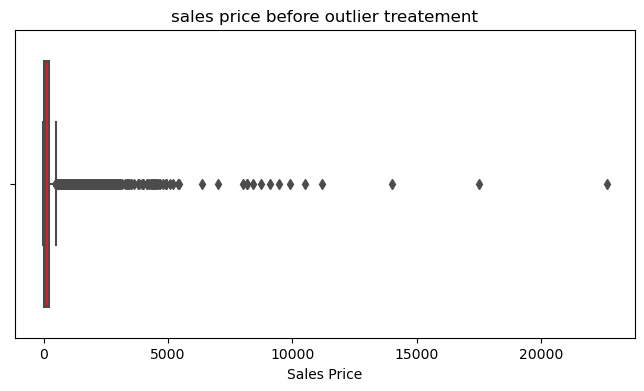

In [62]:
# plotting a box plot to visualise the outliers
plt.figure(figsize=(8,4))
sns.boxplot(x='Sales Price',data=df,color='red')
plt.title('sales price before outlier treatement')
plt.show()

In [63]:
# removing outliers from sales price columns

def remove_outliers(df,col):
    # finding iqr
    iqr=1.5*(np.percentile(df[col],75)-np.percentile(df[col],25))
    df.drop(df[df[col]<np.percentile(df[col],25)-iqr].index,inplace=True)
    df.drop(df[df[col]>np.percentile(df[col],75)+iqr].index,inplace=True)

remove_outliers(df,'Sales Price')

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='Sales Price'>

Text(0.5, 1.0, 'sales price after removing outlier treatement')

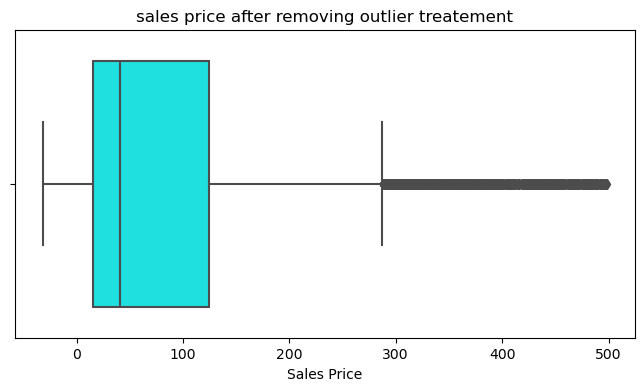

In [64]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Sales Price',data=df,color='cyan')
plt.title('sales price after removing outlier treatement')
plt.show()

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='Total Sales', ylabel='Density'>

Text(0.5, 1.0, 'before outlier treatement')

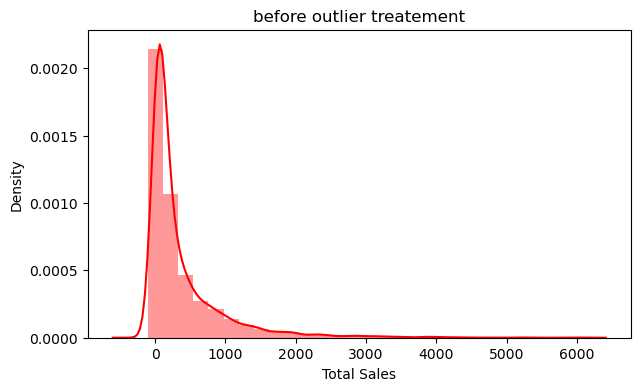

In [65]:
# outliers in total sales price column
plt.figure(figsize=(7,4))
sns.distplot(df['Total Sales'],color='red',bins=30)
plt.title('before outlier treatement')

In [66]:
# detecting outliers

list=[]
def outliers(col):
    q1=np.percentile(col,25)
    q3=np.percentile(col,75)
    iqr=(q3-q1)
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    for x in col:
        if x<lower or x>upper:
            list.append(x)

outliers(df['Total Sales'])
print(list)

[1319.8500000000001, 1822.0500000000002, 3135.02, 2399.75, 1282.56, 1791.36, 1439.91, 1223.94, 1624.5, 1824.75, 1125.92, 1292.62, 1587.68, 2238.48, 3961.71, 1162.75, 1274.5, 1897.0, 1676.56, 1199.0, 1228.77, 1151.28, 1292.62, 1784.28, 1484.68, 3564.4, 1530.66, 1421.28, 1599.5, 3046.88, 3457.44, 2735.82, 1918.72, 1292.56, 1198.8, 1294.7400000000002, 1655.28, 1071.0, 3320.19, 2303.36, 1214.43, 1251.3600000000001, 1597.0500000000002, 1065.6, 1437.28, 1343.79, 2098.72, 1799.6399999999999, 2777.6, 1180.5, 1545.84, 1899.8, 1347.3000000000002, 1360.8000000000002, 1088.82, 2386.5, 1406.86, 1753.62, 3784.7599999999998, 1273.02, 1108.5900000000001, 2097.0, 1367.28, 1556.24, 1548.56, 1077.18, 2149.5, 1920.0, 1433.4, 1359.84, 3312.0, 1254.9, 2272.8, 1242.96, 1699.8, 1774.5, 1461.76, 1519.6000000000001, 1313.5500000000002, 1622.56, 2267.19, 1740.68, 1359.3600000000001, 1632.1499999999999, 5218.7300000000005, 2745.09, 1439.91, 1707.93, 1477.0, 1279.88, 1586.16, 2897.64, 1932.56, 3000.76, 2124.799999

In [67]:
# removing outliers

def removing_out(df,col):
    iqr=1.5*(np.percentile(df[col],75)-np.percentile(df[col],25))
    df.drop(df[df[col]<np.percentile(df[col],25)-iqr].index,inplace=True)
    df.drop(df[df[col]>np.percentile(df[col],75)+iqr].index,inplace=True)

removing_out(df,'Total Sales')

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='Total Sales', ylabel='Density'>

Text(0.5, 1.0, 'after removing outlier treatement')

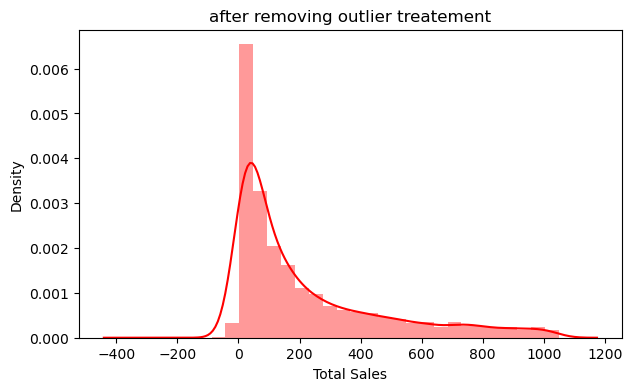

In [68]:
plt.figure(figsize=(7,4))
sns.distplot(df['Total Sales'],color='red',bins=30)
plt.title('after removing outlier treatement')

# 10 customer segmentation and analysis (doubt)

In [69]:
# calculate customer sales quintile and customer profit quintile based on total sales and total profit per customer id

In [70]:
customertotal=df.groupby('Customer ID')[['Total Sales','Total Profit']].sum().reset_index()

# dividing data into 5 equal part (q1,q2,q3,q4,q5) q1=represent bottom 20% and q5=represent top 20%

customertotal['customer sales quintile']=pd.qcut(customertotal['Total Sales'],q=5,labels=False)+1
customertotal['customer profit quintile']=pd.qcut(customertotal['Total Profit'],q=5,labels=False)+1


In [71]:
# create a cross grid cross tabulation based on this 2 quintile

pd.crosstab(customertotal['customer sales quintile'],customertotal['customer profit quintile'],margins=True)

customer profit quintile    1    2    3    4    5  All
customer sales quintile                               
1                          42   78   37    1    0  158
2                          36   40   44   38    0  158
3                          26   23   41   53   15  158
4                          31   11   26   40   50  158
5                          23    6   10   26   93  158
All                       158  158  158  158  158  790

# final analysis and dashbord creation

In [72]:
# sales and profit analysis

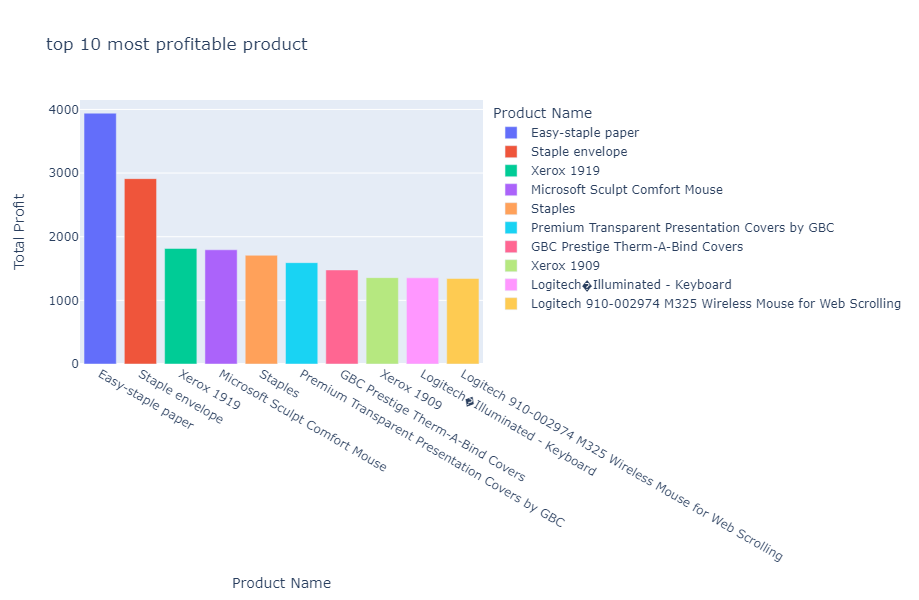

In [73]:
# top 10 most profitable product

top=df.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=False)[0:10].reset_index()

fig=px.bar(top,x='Product Name',y='Total Profit',color='Product Name',height=600,title='top 10 most profitable product')
fig

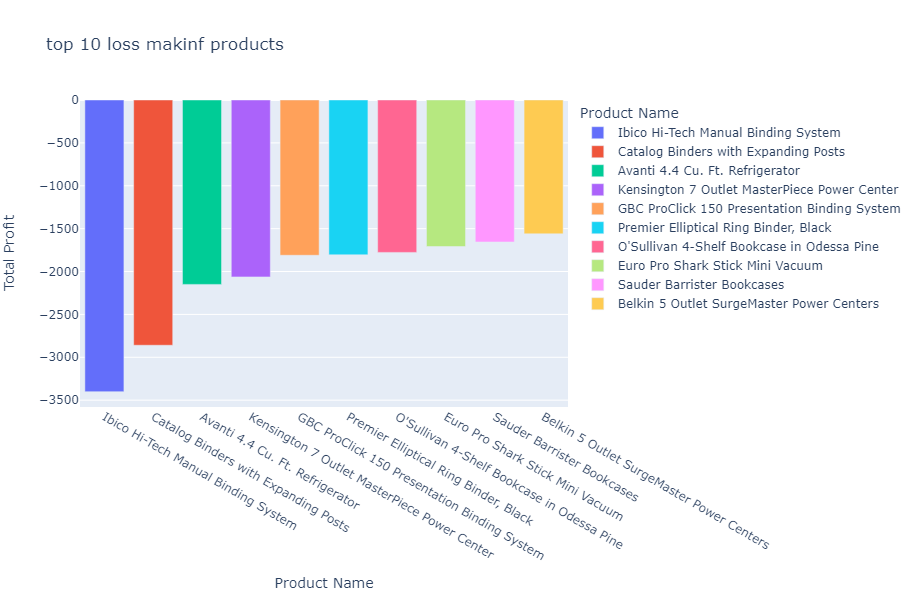

In [74]:
# top 10 loss most loss making products

toploss=df.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=True)[0:10].reset_index()

px.bar(toploss,x='Product Name',y='Total Profit',color='Product Name',height=600,title='top 10 loss makinf products')

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='Total Sales', ylabel='Total Profit'>

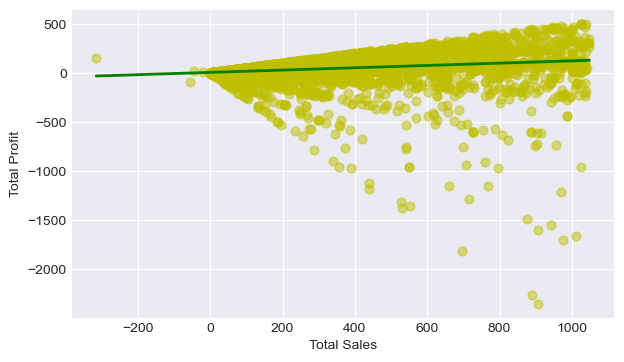

In [75]:
# sales vs profit corelation add a regression line to show the trend
# regression: effect of one variable over the other
# we want to understand the effect of total sales on the totalprofit

plt.figure(figsize=(7,4))
plt.style.use('seaborn-v0_8-darkgrid')
sns.regplot(x='Total Sales',y='Total Profit',data=df,
           scatter_kws={'color':'y','s':40,'alpha':0.5},
           line_kws={'color':'g','linewidth':2})

# the regression line is slightly upward which tell us there is very week positive corelation or close to no corealtion

<Figure size 400x300 with 0 Axes>

<Axes: >

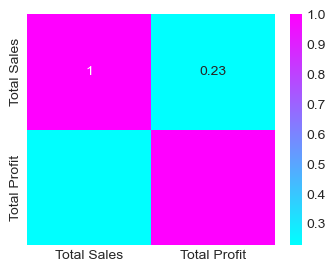

In [76]:
corelation=df[['Total Sales','Total Profit']].corr()

plt.figure(figsize=(4,3))
sns.heatmap(corelation,annot=True,cmap='cool')

# there is a positive week corelation

In [77]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 0.98, 'joint plot of total sales and total profit')

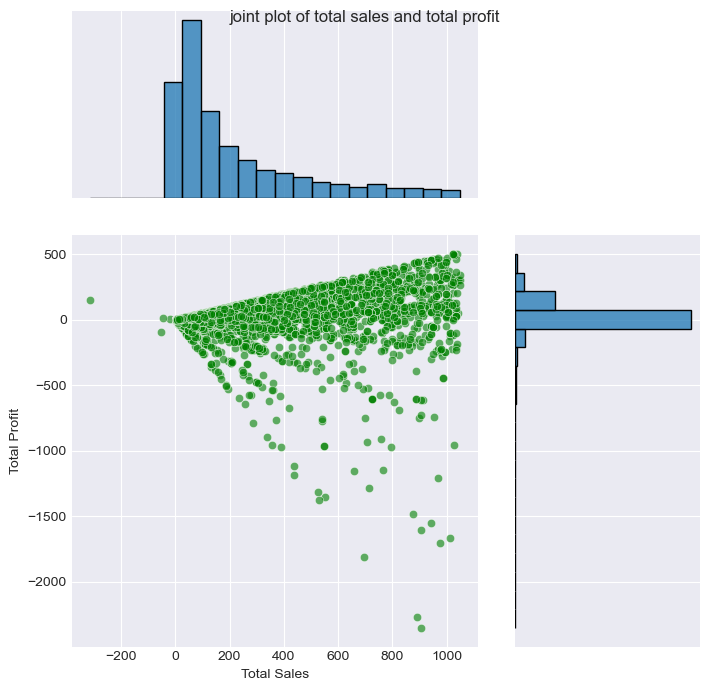

In [78]:
# joint distribution of sales and profit : analyse the relation between total sales and total profit)

sns.jointplot(x='Total Sales',y='Total Profit',data=df,kind='scatter',joint_kws={'color':'green','alpha':0.6},
             marginal_kws=dict(bins=20, fill=True),height=7,ratio=2)
plt.suptitle('joint plot of total sales and total profit')

<Figure size 1800x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Total Sales', ylabel='Count'>

Text(0, 0.5, 'frequency')

Text(0.5, 1.0, 'distribution of total sales')

<Axes: >

<Axes: xlabel='Total Profit', ylabel='Count'>

Text(0, 0.5, 'frequency')

Text(0.5, 1.0, 'distribution of total profit')

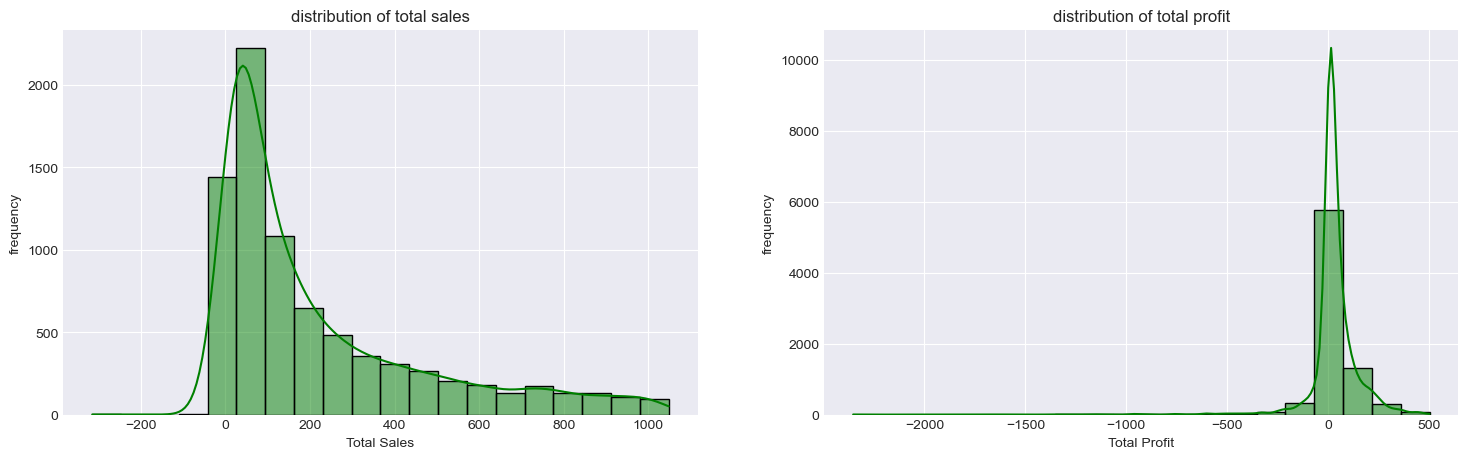

In [79]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.histplot(df['Total Sales'],bins=20,color='green',kde=True)
plt.ylabel('frequency')
plt.title('distribution of total sales')

plt.subplot(1,2,2)
sns.histplot(df['Total Profit'],bins=20,color='green',kde=True)
plt.ylabel('frequency')
plt.title('distribution of total profit')

# 11.2 (1) customer sales quintile and customer profit quintile

<Figure size 400x300 with 0 Axes>

<Axes: >

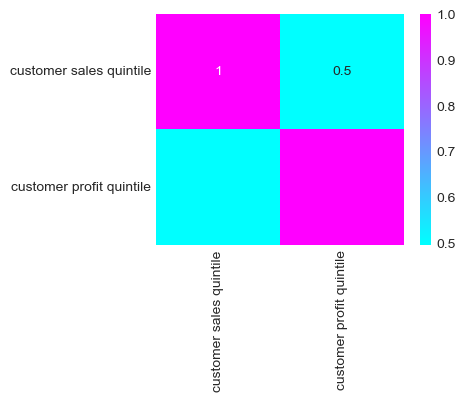

In [80]:
# customer sales quintle vs customer profit quintle

corr=customertotal[['customer sales quintile','customer profit quintile']].corr()

plt.figure(figsize=(4,3))
sns.heatmap(corr,annot=True,cmap='cool')

# there is a positive week corelation between customer sales quintle and customer profit quintile

# 11.2 (2) understand how different product categories perform across customer segment

In [81]:
# create a pivot table to analyse the total sales and total profit by category and segment 
# sort the pivot table to highlight the most profitable and least profitable combination of category and segment

df.pivot_table(index=['Category','Segment'],
               values=['Total Sales','Total Profit'],
              aggfunc=np.sum).sort_values(by='Total Profit',ascending=False)

# the most profitable is office supplies and consumer
# least profitable furniture and consumer

Total Profit  Total Sales
Category        Segment                               
Office Supplies Consumer         87560.23    479958.73
                Corporate        50352.02    266973.28
                Home Office      32800.83    159468.59
Technology      Consumer         28623.91    208471.06
                Corporate        21637.08    134492.24
                Home Office      10652.81     61416.93
Furniture       Corporate         6135.11    127262.73
                Home Office       4632.23     67001.19
                Consumer           251.04    239127.13

# 11.3 (1) shipping and delivery analysis

Shipping urgency
standard     5391
urgent       2167
immediate     404
Name: count, dtype: int64

<Figure size 400x400 with 0 Axes>

([<matplotlib.patches.Wedge at 0x2535c8f0650>,
 [Text(-1.0190269940775758, -0.633706545130489, 'standard'),
  Text(1.0144728118345285, 0.4252586437082093, 'urgent'),
  Text(0.17460667338369767, 1.086053640300459, 'immediate')],
 [Text(-0.6793513293850504, -0.4224710300869926, '67.7%'),
  Text(0.6455736075310634, 0.27061913690522404, '27.2%'),
  Text(0.11111333760780759, 0.6911250438275648, '5.1%')])

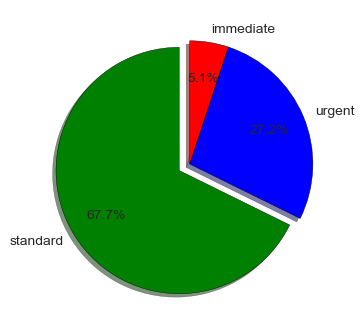

In [82]:
# distribution of shipping urgency

shipping=df['Shipping urgency'].value_counts()
shipping
label=['standard','urgent','immediate']
color=['g','b','r']
explode=[0.1,0,0]

plt.figure(figsize=(4,4))
plt.pie(shipping,labels=label,colors=color,explode=explode,autopct='%.1f%%',startangle=90,shadow=True,wedgeprops={'edgecolor':
                                                                                                                 'black','linewidth':
                                                                                                                 0.3},pctdistance=0.7)
# most of the customer prefered standard shipping urgency

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='Days to ship', ylabel='Total Profit'>

Text(0.5, 1.0, 'days to ship vs profit')

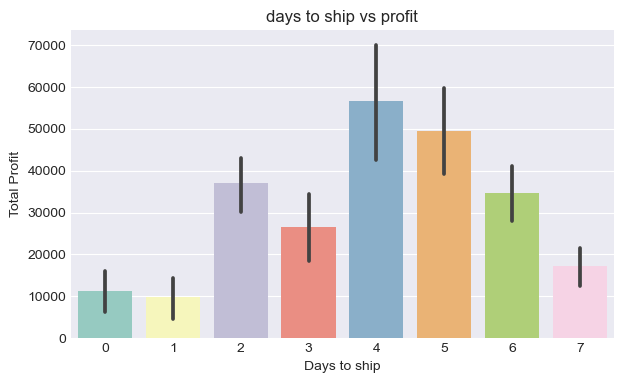

In [83]:
# days to ship vs profit use a violin plot to explore distribution of profit over across different days to ship

plt.figure(figsize=(7,4))
sns.barplot(x='Days to ship',y='Total Profit',data=df,estimator='sum',palette='Set3')
plt.title('days to ship vs profit')

# as we can see the faster shipping has the lowest profit

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='Ship Mode', ylabel='Total Profit'>

Text(0.5, 1.0, 'ship mode vs profit')

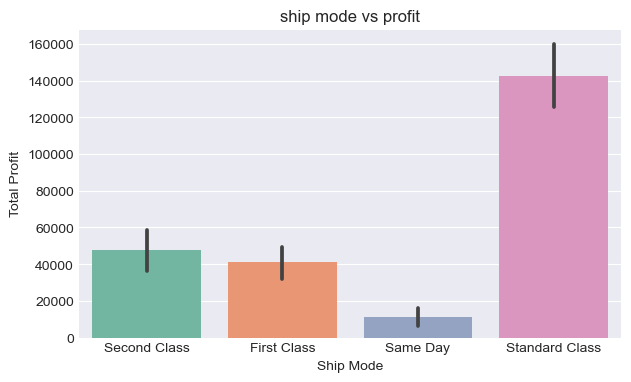

In [84]:
# shipping mode and profitability

plt.figure(figsize=(7,4))
sns.barplot(x='Ship Mode',y='Total Profit',data=df,estimator='sum',palette='Set2')
plt.title('ship mode vs profit')
# standard class has made the heighest profit

In [85]:
# analyse which shipping mode is most prefered across different region

df.pivot_table(index=['Region','Ship Mode'],
              values=['Order ID','Total Sales','Total Profit'],
              aggfunc=np.size)

# standard class is the most prefered shipping mode across all region

Order ID  Total Profit  Total Sales
Region  Ship Mode                                          
Central First Class          244           244          244
        Same Day              93            93           93
        Second Class         369           369          369
        Standard Class      1166          1166         1166
East    First Class          401           401          401
        Same Day             106           106          106
        Second Class         422           422          422
        Standard Class      1356          1356         1356
South   First Class          190           190          190
        Same Day              59            59           59
        Second Class         252           252          252
        Standard Class       774           774          774
West    First Class          417           417          417
        Same Day             139           139          139
        Second Class         499           499          499
        Standard Class      1475          1475         1475

# regional sales and profitability

<Axes: xlabel='State'>

Text(0.5, 1.0, 'Sales and Profit by state')

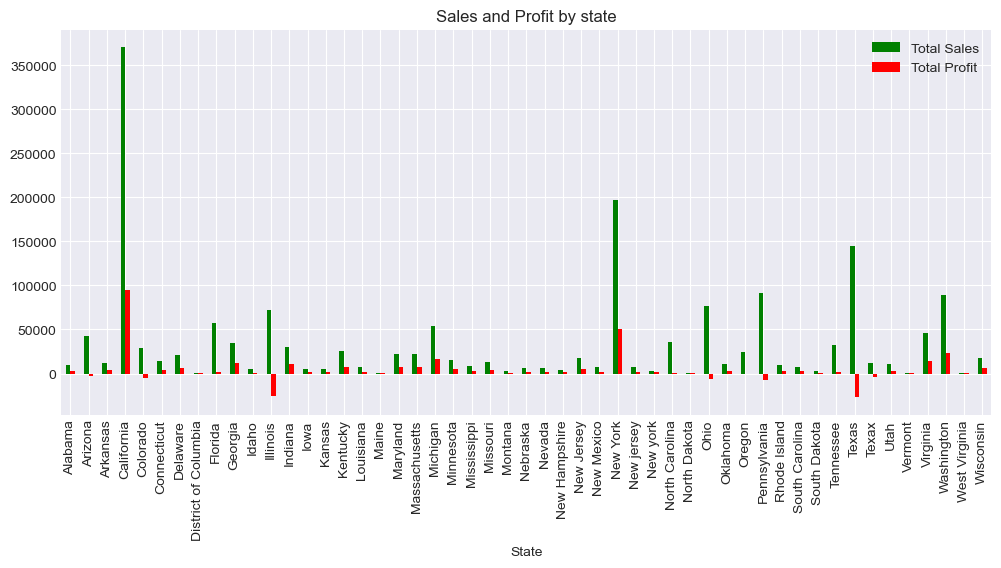

In [86]:
# sales and profit by state

df.groupby('State')[['Total Sales','Total Profit']].sum().plot.bar(figsize=(12,5),color=('g','r'))
plt.title('Sales and Profit by state')

In [87]:
# state wise profitability

df.pivot_table(index='State',
              values='Total Profit',
              aggfunc=np.sum).sort_values(by='Total Profit',ascending=False)

Total Profit
State                             
California                94363.03
New York                  50209.00
Washington                23358.57
Michigan                  16903.32
Virginia                  14526.15
Georgia                   11439.20
Indiana                   10685.88
Kentucky                   7890.67
Massachusetts              7579.88
Maryland                   7011.19
Delaware                   6116.85
Wisconsin                  6050.61
New Jersey                 5473.56
Minnesota                  4892.15
Arkansas                   4518.74
Connecticut                4410.47
Missouri                   3577.95
Utah                       3249.66
Oklahoma                   3128.86
Alabama                    3072.53
Mississippi                3058.23
Rhode Island               2790.11
South Carolina             2311.26
Nevada                     2255.20
New jersey                 2204.29
Louisiana                  2125.04
Iowa                       2085.79
Nebraska                   1894.86
New Mexico                 1807.64
Florida                    1758.81
Kansas                     1722.74
New Hampshire              1549.53
New york                   1352.58
Tennessee                  1324.83
Idaho                       969.79
South Dakota                822.84
Montana                     816.03
North Carolina              788.31
District of Columbia        380.22
North Dakota                285.78
Vermont                     259.33
West Virginia               208.02
Maine                       187.48
Oregon                     -156.13
Arizona                   -3306.20
Texax                     -4376.93
Colorado                  -5032.39
Ohio                      -5766.11
Pennsylvania              -7757.14
Illinois                 -25454.58
Texas                    -26922.24

In [88]:
# corelation between state and profit
# convert the categorical column ('state') to numerical column using label encoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

# converting to numerical column
df['State Encoded']=le.fit_transform(df['State'])

df[['State Encoded','Total Profit']].corr().round(2)
# no corelation between state and profit

State Encoded  Total Profit
State Encoded           1.00         -0.08
Total Profit           -0.08          1.00

# discount and pricissing analysis

<Axes: xlabel='Discount', ylabel='Profit'>

Text(0.5, 1.0, 'corelation between discount and profitability')

Discount   Profit
Discount   1.00000 -0.49934
Profit    -0.49934  1.00000

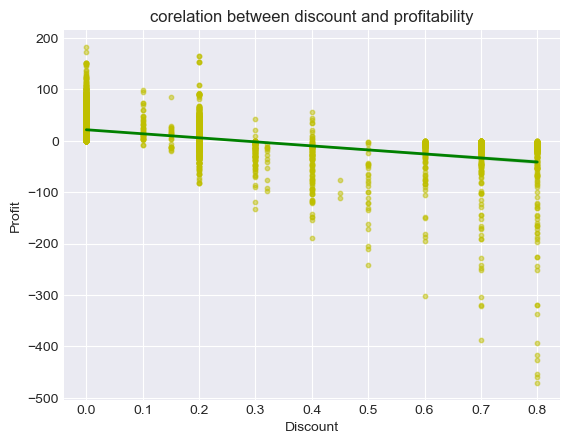

In [89]:
# impact of discounts on profitability

sns.regplot(x='Discount',y='Profit',data=df,scatter_kws={'color':'y','alpha':0.5,'s':10},
       line_kws={'color':'g','linewidth':2},marker='o')
plt.title('corelation between discount and profitability')

df[['Discount','Profit']].corr()

# there is a negative week corelation between discount and profitability
# as the discount increases the profit decrease

<Figure size 1000x400 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Appliances'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Bookcases'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Copiers'),
  Text(7, 0, 'Envelopes'),
  Text(8, 0, 'Fasteners'),
  Text(9, 0, 'Furnishings'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Machines'),
  Text(12, 0, 'Paper'),
  Text(13, 0, 'Phones'),
  Text(14, 0, 'Storage'),
  Text(15, 0, 'Supplies'),
  Text(16, 0, 'Tables')])

Text(0.5, 1.0, 'original price vs discount price')

Text(0.5, 0, 'product subcategory')

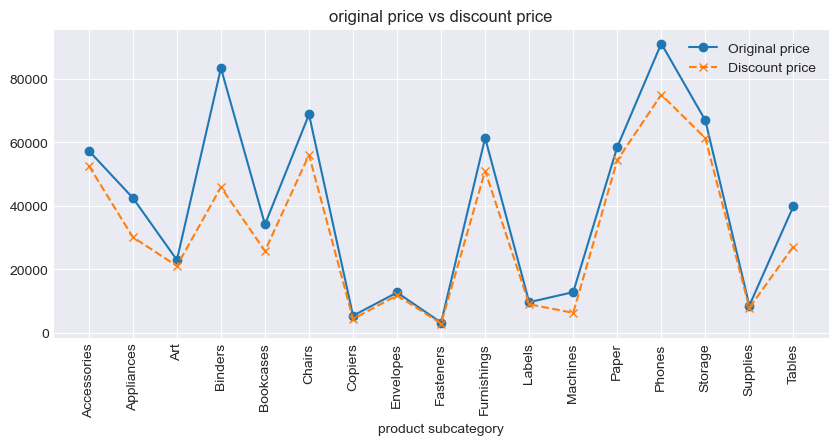

In [90]:
# original price vs discounted price

subcategory=df.groupby('Sub Category')[['Original price','Discount price']].sum()

plt.figure(figsize=(10,4))
plt.plot(subcategory.index,subcategory['Original price'],marker='o',label='Original price')
plt.plot(subcategory.index,subcategory['Discount price'],marker='x',label='Discount price',linestyle='--')
plt.xticks(rotation=90)
plt.title('original price vs discount price')
plt.legend()
plt.xlabel('product subcategory')
plt.show()

# temporal analysis

In [91]:
# sales and profit trend overtime

df_new=df.copy()

df_new.set_index('Order Date',inplace=True)

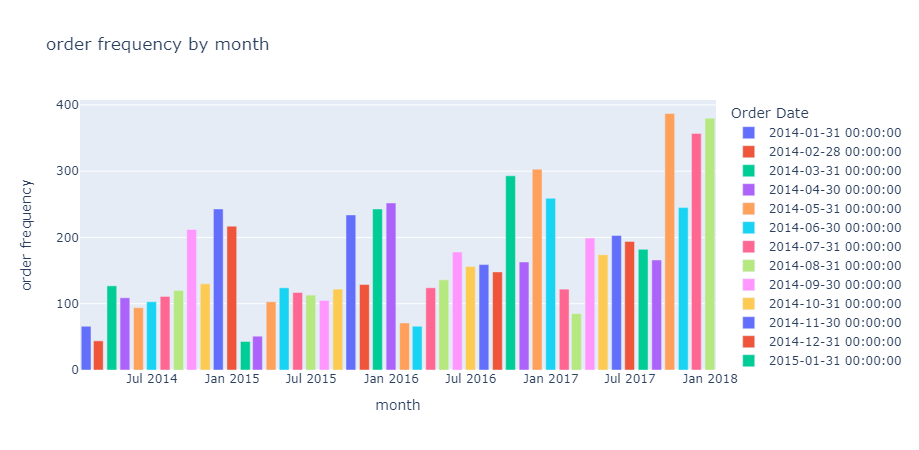

In [92]:
# order frequency by month (no of order placed each month)

month=df_new['Order ID'].resample(rule='M').count().reset_index()
# month
fig=px.bar(month,x='Order Date',y='Order ID',color='Order Date',height=450,title='order frequency by month'
          )
fig.update_layout(xaxis_title='month',yaxis_title='order frequency')

# sept 2017 has the heighest no of order placed
# feb 2014 has the lowest no of order placed

<Axes: xlabel='Order Date'>

Text(0.5, 0, 'year')

Text(0.5, 1.0, 'sales and profit over the year')

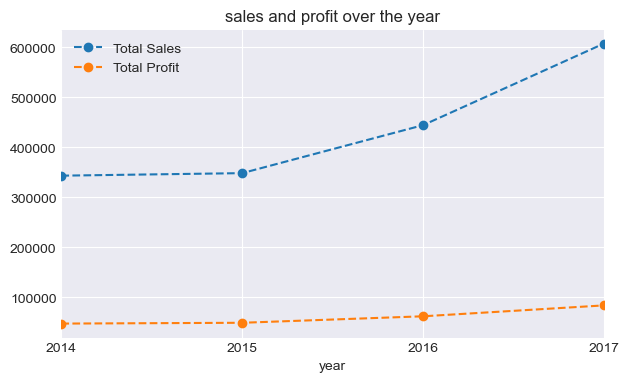

In [93]:
# sales and profit trend over time

df_new[['Total Sales','Total Profit']].resample(rule='A').sum().plot.line(marker='o',figsize=(7,4),linestyle='--')
plt.xlabel('year')
plt.title('sales and profit over the year')

# 11 .6 (3)

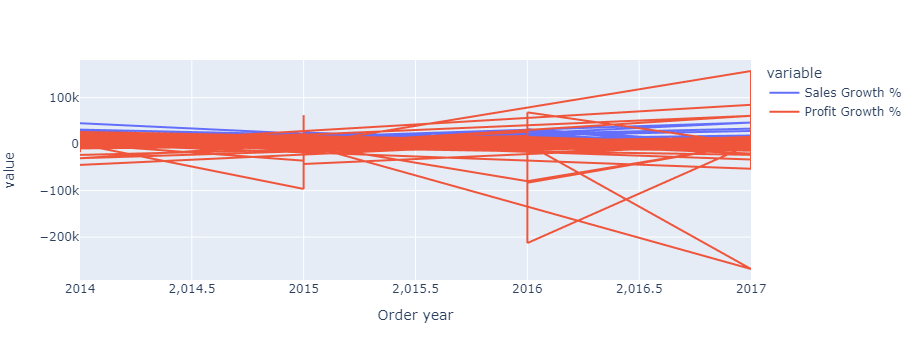

In [94]:
# yearly growth in sales and profit use year-over-year growth chart to compare sales and profit growth
# over different year

# pct_change(): Calculates the percentage change between the current and a prior element.

# calculating year over year growth percentage
df['Sales Growth %']=df['Total Sales'].pct_change()*100
df['Profit Growth %']=df['Total Profit'].pct_change()*100

px.line(df,x='Order year',y=['Sales Growth %','Profit Growth %'])

In [95]:
df.drop('days to ship',axis=1,inplace=True)

In [96]:
df.head()

Order ID Order Date  Ship Date     Ship Mode Customer ID    Segment  \
0  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   Consumer   
2  CA-2017-164098 2017-01-26 2017-01-27   First Class    CG-12520   Consumer   
3  US-2015-123918 2015-10-15 2015-10-15      Same Day    CG-12520   Consumer   
4  US-2015-123918 2015-10-15 2015-10-15      Same Day    CG-12520   Consumer   
5  CA-2016-138688 2016-06-12 2016-06-16  Second Class    DV-13045  Corporate   

  Country         City       State Postal Code  ... Discount price  \
0     USA    Henderson    Kentucky       42420  ...         261.96   
2     USA      Houston       Texas       77070  ...          18.16   
3     USA       Dallas       Texas       75217  ...         131.38   
4     USA       Dallas       Texas       75217  ...           5.34   
5     USA  Los Angeles  California       90036  ...          14.62   

  Total discount Shipping urgency Days since last order Total sales per cust  \
0         523.92           urgent                   0.0              3549.68   
2          36.32           urgent                  79.0              3549.68   
3         788.28        immediate                -469.0              3549.68   
4           5.34        immediate                   0.0              3549.68   
5          29.24         standard                   0.0              6156.91   

   Total quantity per cust  Discount per cust  State Encoded  Sales Growth %  \
0                       14               1.00             15             NaN   
2                       14               1.00             43      -93.067644   
3                       14               1.00             43     2070.374449   
4                       14               1.00             43      -99.322576   
5                       28               1.55              3      447.565543   

   Profit Growth %  
0              NaN  
2       -95.657361  
3    -15800.549451  
4      -100.327209  
5       634.759358  

[5 rows x 38 columns]

In [97]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub Category', 'Product Name', 'Sales Price',
       'Quantity', 'Discount', 'Profit', 'Order id year', 'Order year',
       'Ship year', 'diff', 'Days to ship', 'Customer Name Masked',
       'Total Sales', 'Total Profit', 'Original price', 'Discount price',
       'Total discount', 'Shipping urgency', 'Days since last order',
       'Total sales per cust', 'Total quantity per cust', 'Discount per cust',
       'State Encoded', 'Sales Growth %', 'Profit Growth %'],
      dtype='object')